<a href="https://colab.research.google.com/github/adelriscom/DataScience/blob/main/Lab3_AI_ML_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Dataset

Breast Cancer ML investigation

Breast Cancer Diagnosis and Classification Using Machine Learning

**Objective:**
Breast cancer is a widespread worldwide health issue, and early and accurate detection is critical for optimal treatment and patient outcomes. The goal of this project is to use machine learning approaches to improve breast cancer detection and classification, resulting in better patient care.

**Methods & Procedures:** We used the Breast Cancer dataset, a well-known resource that contains a variety of tumor-related variables. An early investigation uncovered feature correlations, which drove additional study.

2. **Model Training with All data**: Using all available data, we trained four classification models: Logistic Regression, Support Vector Machines (with linear and radial basis function kernels), and K-Nearest Neighbours.

3. **Evaluation measures**: We used essential measures such as accuracy, precision, recall, and F1 score to assess model performance. We also created confusion matrices to thoroughly evaluate categorization results.

4. **Feature Selection**: To improve model efficiency, we used SelectKBest with the f_classif score function to identify the five most significant features.

5. **Model Training with chosen characteristics**: To increase both predicted accuracy and model interpretability, we retrained the same models with just the chosen characteristics.

**Results:**
- Model Performance with All Features: The preliminary research revealed that all models performed admirably in identifying breast cancer patients. The Support Vector Machine with a radial basis function kernel (SVC-RBF) had the greatest overall accuracy.

- Feature Selection: Five essential characteristics were found during the feature selection process, allowing for more efficient model training.

- Model Performance with Selected Features: In certain situations, further model training with the selected features enhanced performance, highlighting the relevance of feature selection in improving model outputs.

**Conclusion:**
This research demonstrates the use of machine learning approaches in the identification and categorization of breast cancer. Our findings show that reliable predictions may be made based on tumour features, providing useful information for clinical decision-making. Feature selection refines the models further, stressing the significance of exploiting key features. This study' results add to continuing attempts to improve breast cancer detection, and the approaches used here may serve as a platform for future research in this vital subject.




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif

**Step 1: Load the breast cancer dataset**
- The breast cancer dataset is loaded from scikit-learn, containing diagnostic measurements as features and binary classes (0: malignant, 1: benign) as the target.
- The dataset is split into features (X) and target labels (y).

In [ ]:
# Step 1: Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

>In this combined DataFrame, I have the diagnostic measurements (features) along with the target variable (target) indicating whether the diagnosis is malignant (0) or benign (1).

>This format is convenient for further analysis, data visualization, and machine learning modeling, as I can use the cancer DataFrame to train and test machine learning models without needing to separately reference X and y.


In [ ]:
# Concatenate features and target for easier analysis
cancer = pd.concat([X, y], axis=1)
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Assign the shape of the 'cancer' dataset to a variable
cancer_shape = cancer.shape

# Print the dimensions of the dataset
print("Cancer data set dimensions: {}".format(cancer_shape))

Cancer data set dimensions: (569, 31)


>This code will output the count of missing values for each column in the cancer DataFrame. It will help me identify if there are any missing values in your dataset.

In [ ]:
cancer.isnull().sum()
cancer.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
0                          0
dtype: int64

**Step 2: Explore the dataset and analyze feature correlations**
- A heatmap of feature correlations is generated using Seaborn. This helps visualize the relationships between the different diagnostic measurements.
- The heatmap allows you to see which features are positively or negatively correlated with each other, providing insights into the dataset's structure.


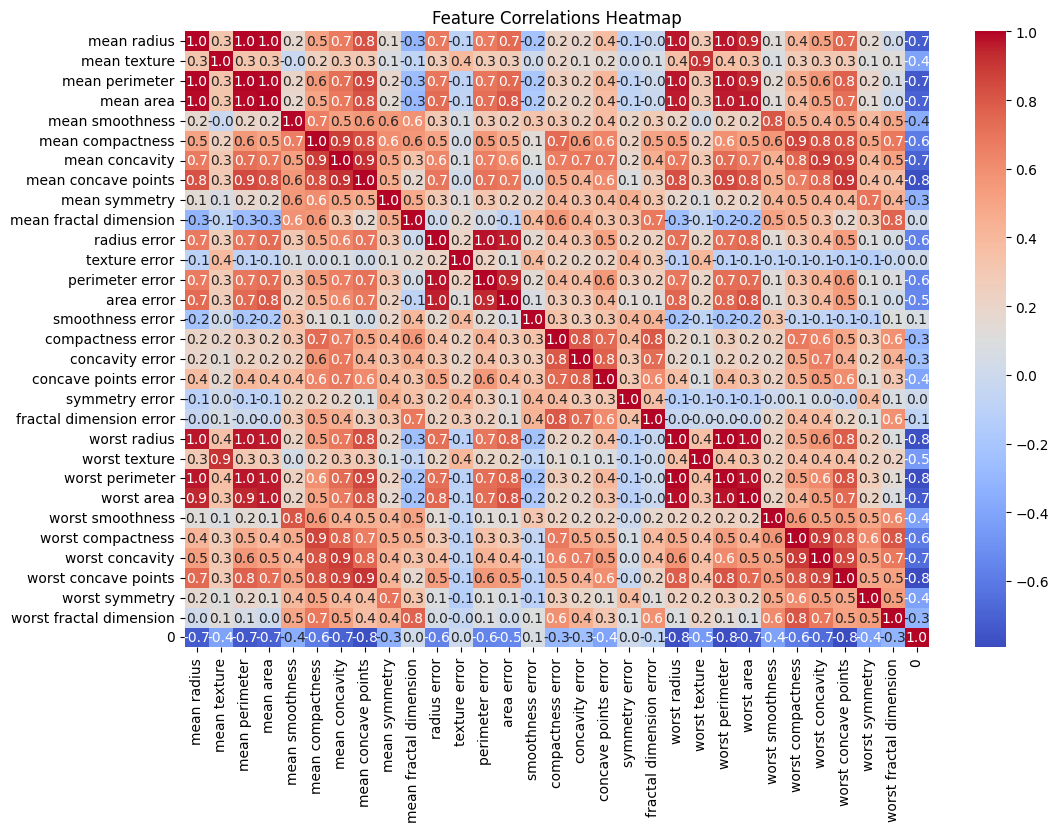

In [ ]:
# Step 2: Explore the dataset and analyze feature correlations
# Calculate feature correlations
correlation_matrix = cancer.corr()
# Visualize feature correlations using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".01f")
plt.title("Feature Correlations Heatmap")
plt.show()

**Step 3: Split the dataset into training and testing sets**
- The dataset is split into a training set and a testing set, with 80% of the data used for training and 20% for testing.
- This separation ensures that the models are trained on one portion of the data and evaluated on another, helping to assess their generalization performance.


In [ ]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 4: Train classification models using all features**
- Four different classification models are trained: Logistic Regression, Support Vector Machine with a linear kernel, Support Vector Machine with an RBF kernel, and K-Nearest Neighbors.
- The features are standardized using `StandardScaler` to ensure that they have similar scales, which is important for some machine learning algorithms.


In [ ]:
# Step 4: Train classification models using all features
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVC (Linear Kernel)": SVC(kernel='linear'),
    "SVC (RBF Kernel)": SVC(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate models
results_all_features = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    confusion = confusion_matrix(y_test, y_pred)

    results_all_features[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": confusion
    }

**Step 5: Evaluate the model performance using multiple measures**
- The code calculates and displays various classification metrics for each model, including accuracy, precision, recall, and F1 score.
- Bar charts are generated to compare the performance of these models across these metrics, allowing you to see which model performs best for the task.


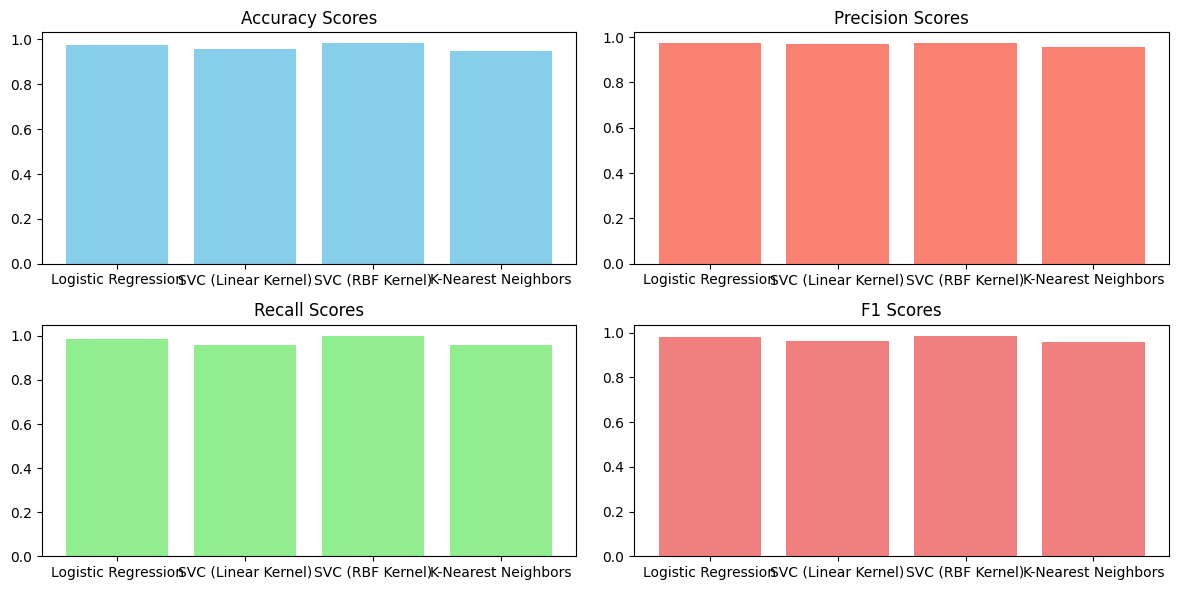

In [ ]:
# Step 5: Evaluate the model performance using multiple measures
model_names = list(results_all_features.keys())
accuracy_scores = [metrics['Accuracy'] for metrics in results_all_features.values()]
precision_scores = [metrics['Precision'] for metrics in results_all_features.values()]
recall_scores = [metrics['Recall'] for metrics in results_all_features.values()]
f1_scores = [metrics['F1 Score'] for metrics in results_all_features.values()]

plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title("Accuracy Scores")

# Precision
plt.subplot(2, 2, 2)
plt.bar(model_names, precision_scores, color='salmon')
plt.title("Precision Scores")

# Recall
plt.subplot(2, 2, 3)
plt.bar(model_names, recall_scores, color='lightgreen')
plt.title("Recall Scores")

# F1 Score
plt.subplot(2, 2, 4)
plt.bar(model_names, f1_scores, color='lightcoral')
plt.title("F1 Scores")

plt.tight_layout()
plt.show()

**Step 6: Select the 5 most important features based on feature importance scores**
- Feature selection is performed using `SelectKBest` with the `f_classif` score function to select the top 5 most important features.
- This step identifies the diagnostic measurements that have the most significant impact on the classification task.


In [ ]:
# Step 6: Select the 5 most important features based on feature importance scores
# Use SelectKBest with f_classif score function
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

**Step 7: Train classification models using selected features**
- The same four classification models are trained again, but this time with only the selected top 5 features.
- These models are used to assess whether using a subset of the most important features improves predictive performance.


In [ ]:
# Step 7: Train classification models using selected features
# Train and evaluate models with selected features
results_selected_features = {}
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    confusion = confusion_matrix(y_test, y_pred)

    results_selected_features[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": confusion
    }

**Step 8: Compare the performance of models with all features vs. selected features**
- Performance metrics (accuracy, precision, recall, F1 score) are compared between models trained with all features and models trained with selected features.
- Bar charts are generated to visualize the performance differences between the two sets of models.
- Confusion matrices are also displayed to provide additional insights into the model's performance, showing true positives, true negatives, false positives, and false negatives for each model.


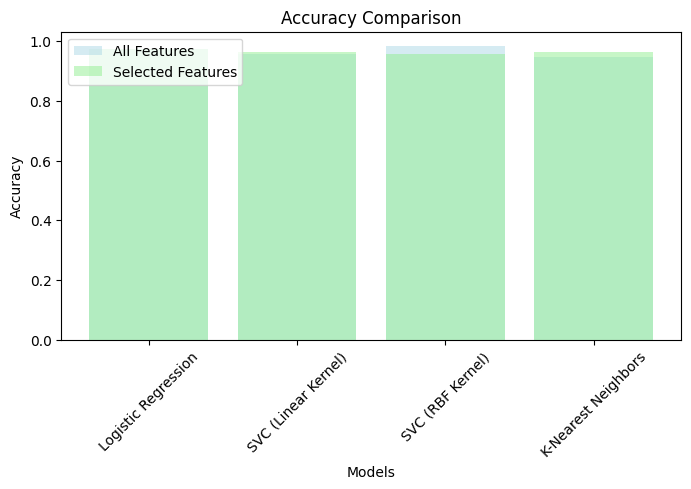

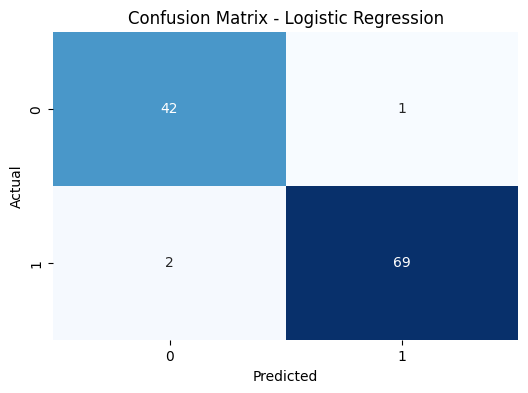

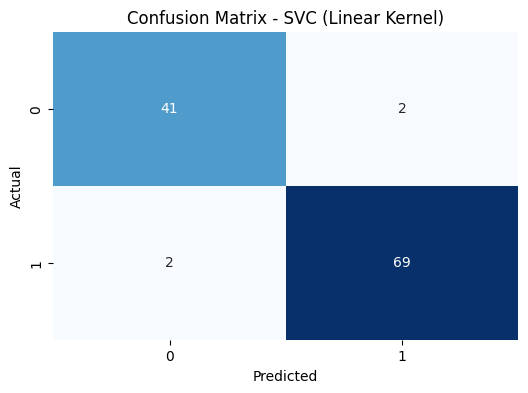

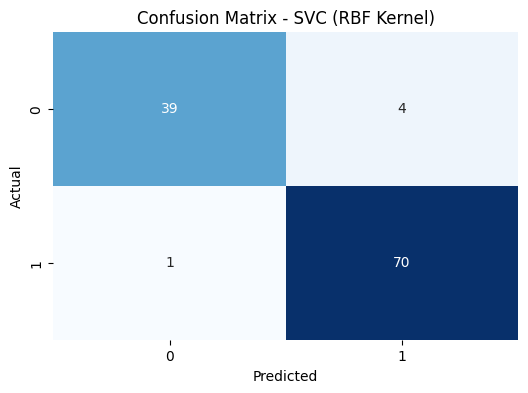

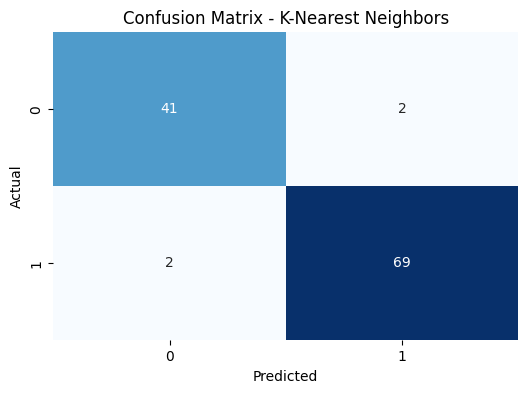

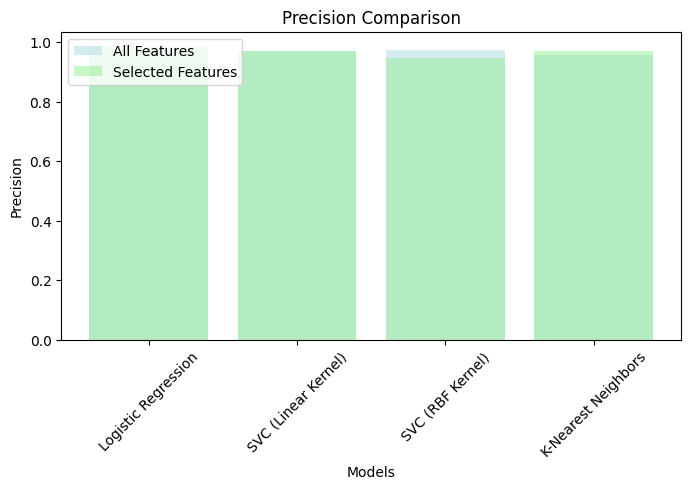

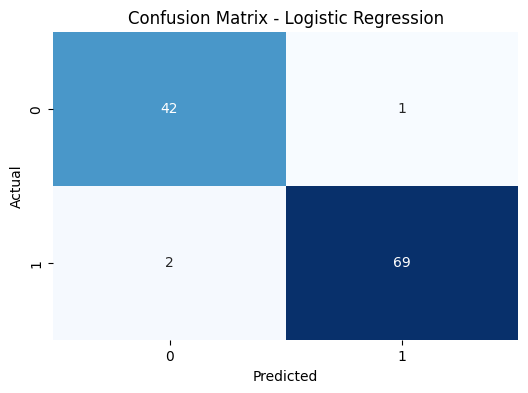

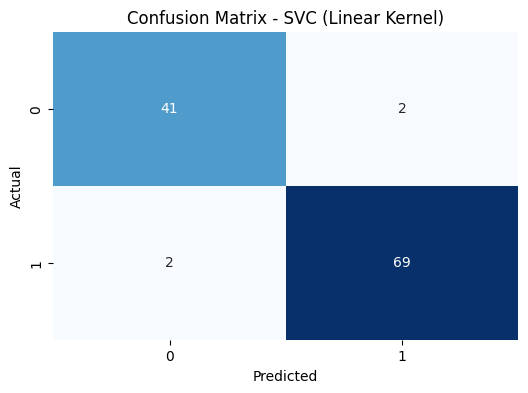

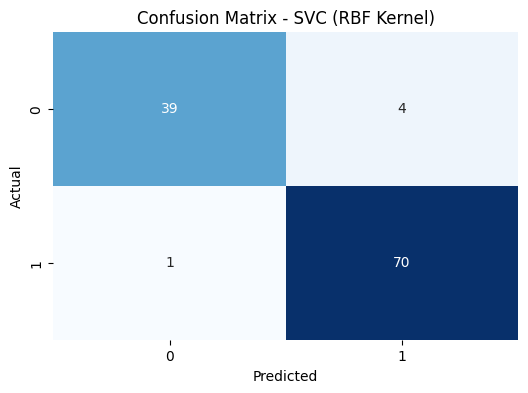

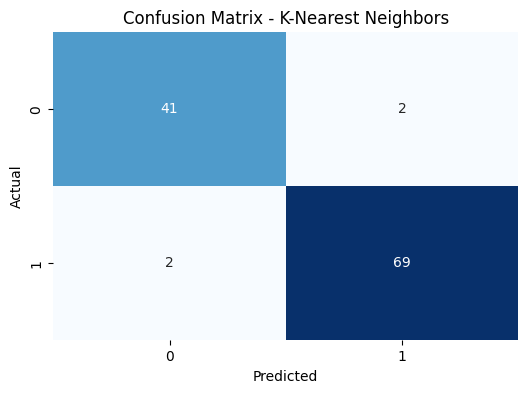

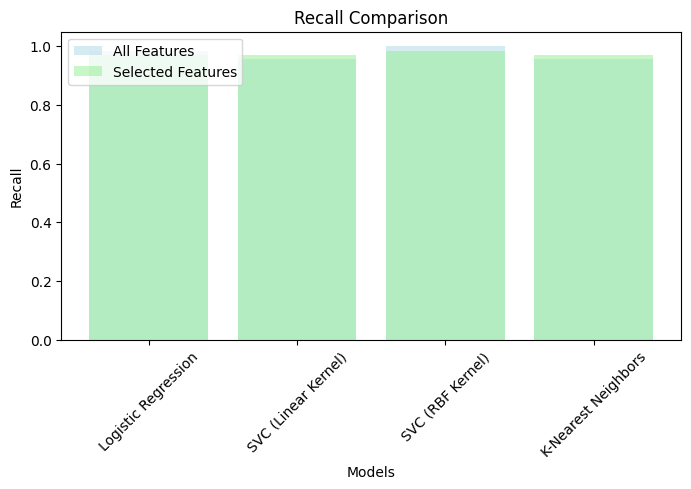

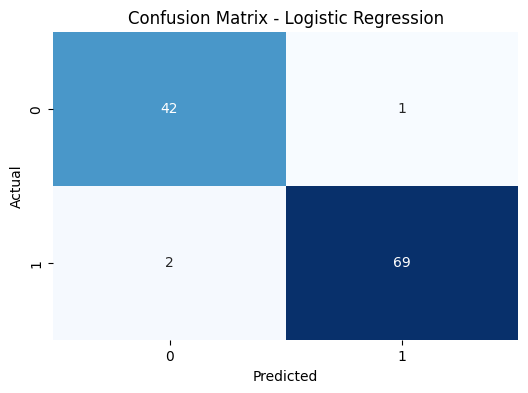

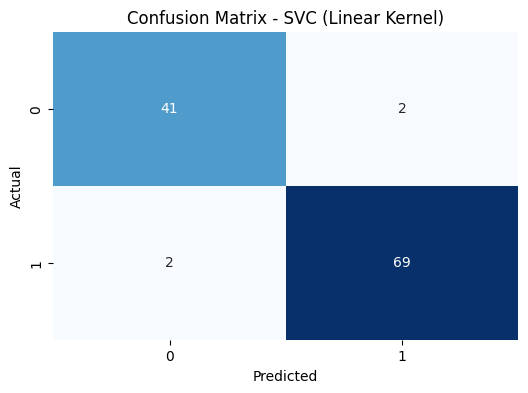

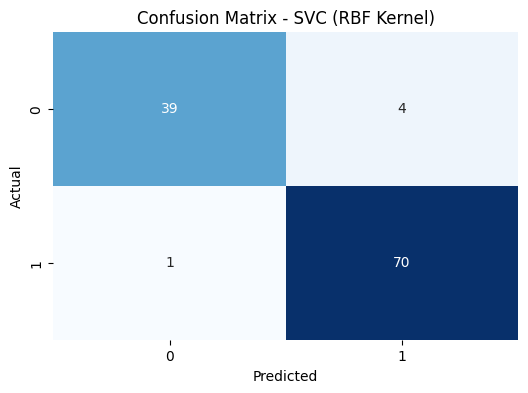

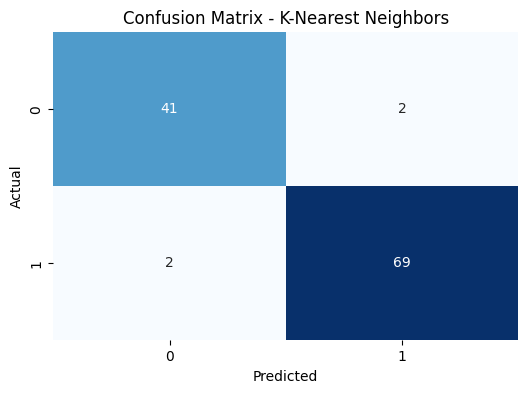

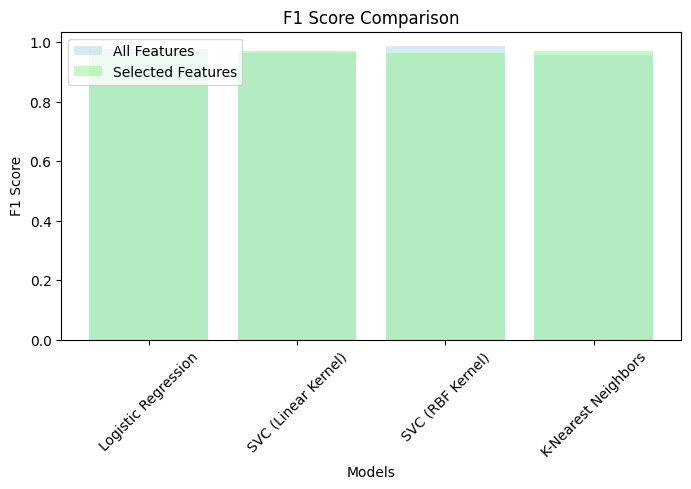

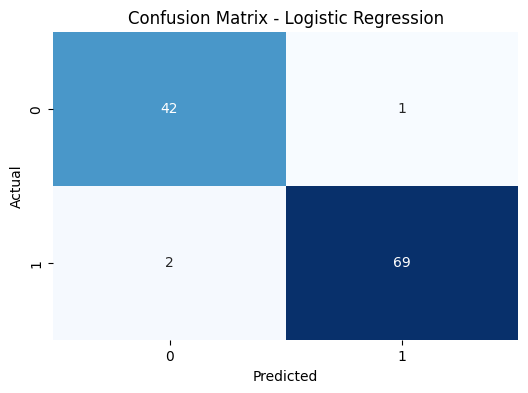

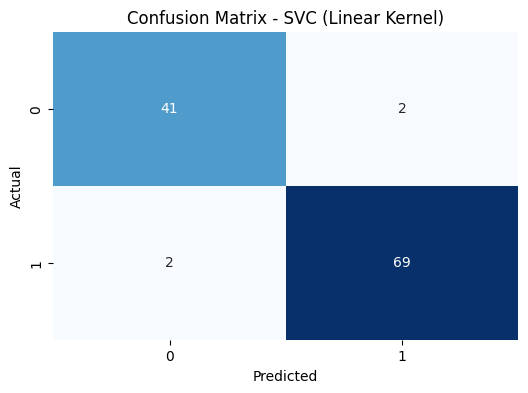

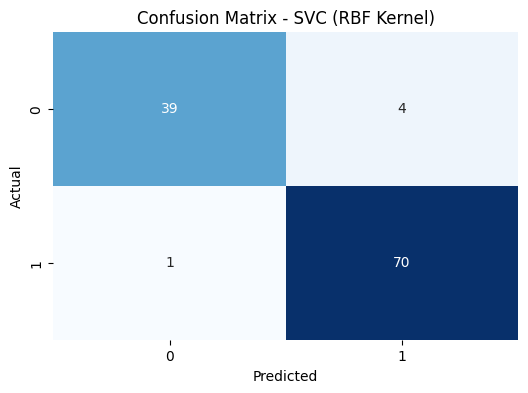

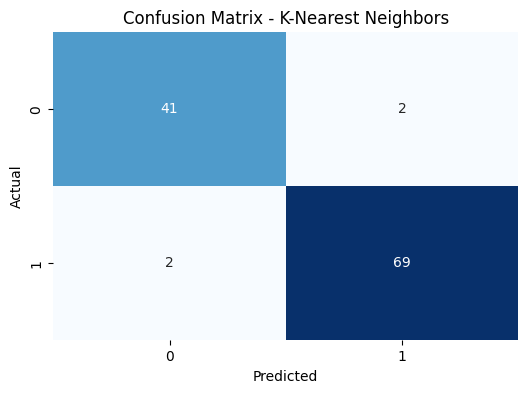

In [ ]:
# Step 8: Compare the performance of models with all features vs. selected features
# Visualize the performance difference including confusion matrices
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in performance_metrics:
    all_features_values = [metrics[metric] for metrics in results_all_features.values()]
    selected_features_values = [metrics[metric] for metrics in results_selected_features.values()]

    plt.figure(figsize=(8, 4))
    plt.bar(model_names, all_features_values, alpha=0.5, label='All Features', color='lightblue')
    plt.bar(model_names, selected_features_values, alpha=0.5, label='Selected Features', color='lightgreen')
    plt.title(f"{metric} Comparison")
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

    # Plot confusion matrices
    for model_name, metrics in results_selected_features.items():
        confusion = metrics["Confusion Matrix"]
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix - {model_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()